Here we are exploring the CIFAR10 dataset using fully connected and neural network

LOADING THE LIBRARIES

In [ ]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator #for data augmentation
if tf.test.gpu_device_name():
    print('Default GPU Device Details: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install Tensorflow that supports GPU")

Default GPU Device Details: /device:GPU:0


## 1. Load your data

In [ ]:
(X_dev, Y_dev), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data() #Loading the dataset

print(X_dev.shape)
print(X_test.shape)

#printing out the shape of the developmental dataset
print("Development set")
print("Images: ",X_dev.shape) #shape of the images of the developmental dataset
print("Labels shape:",Y_dev.shape) #shape of the label of the developmental dataset
print("\nNumber of classes:",np.unique(Y_dev).size)
print("\nClasses:",np.unique(Y_dev)) #the number of classes in the developmental dataset
print("\n---------------------------------------------")
#printing out the shape of the testing dataset
print("\nTest set")
print("Images: ",X_test.shape) #shape of the images of the testing dataset
print("Labels shape: ",Y_test.shape) #shape of the label of the testing dataset

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
Development set
Images:  (50000, 32, 32, 3)
Labels shape: (50000, 1)

Number of classes: 10

Classes: [0 1 2 3 4 5 6 7 8 9]

---------------------------------------------

Test set
Images:  (10000, 32, 32, 3)
Labels shape:  (10000, 1)


COMMENT 

The number of classes is 10.

In the developmental set we have 50k images of dimenions 32 x 32 pixel with 3 channels (RGB).

In the test set we have 10k images of dimenions 32 x 32 pixel with 3 channels (RGB).

## 2. Explore your data 

EXPLORING THE LABELS OF THE DEVELOPMENTAL DATASET

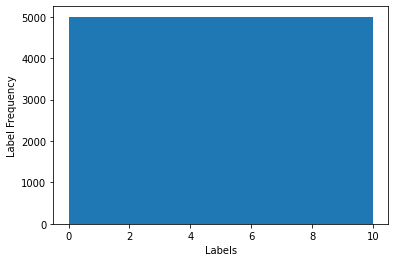

In [ ]:
plt.figure()
plt.hist(Y_dev, bins = range(11)) #since the classes are 10, then the range will be 11
plt.xlabel("Labels") #labelling the x -axis
plt.ylabel("Label Frequency")#labelling the y -axis
plt.show()

COMMENT

All the 10 classes are equally distributed across the developmental dataset

EXPLORING THE LABELS OF THE TEST DATASET

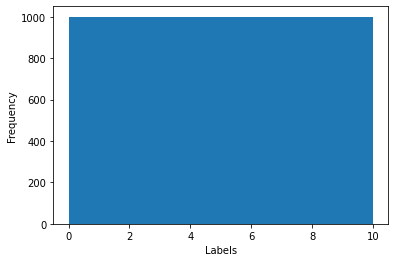

In [ ]:
plt.figure()
plt.hist(Y_test,bins = range(0,11))#since the classes are 10, then the range will range from 0 to 11
plt.xlabel("Labels") #labelling the x -axis
plt.ylabel("Frequency") #labelling the y -axis
plt.show()

COMMENT

All the 10 classes are equally distributed across the test dataset

TAKING A LOOK AT THE DATASET

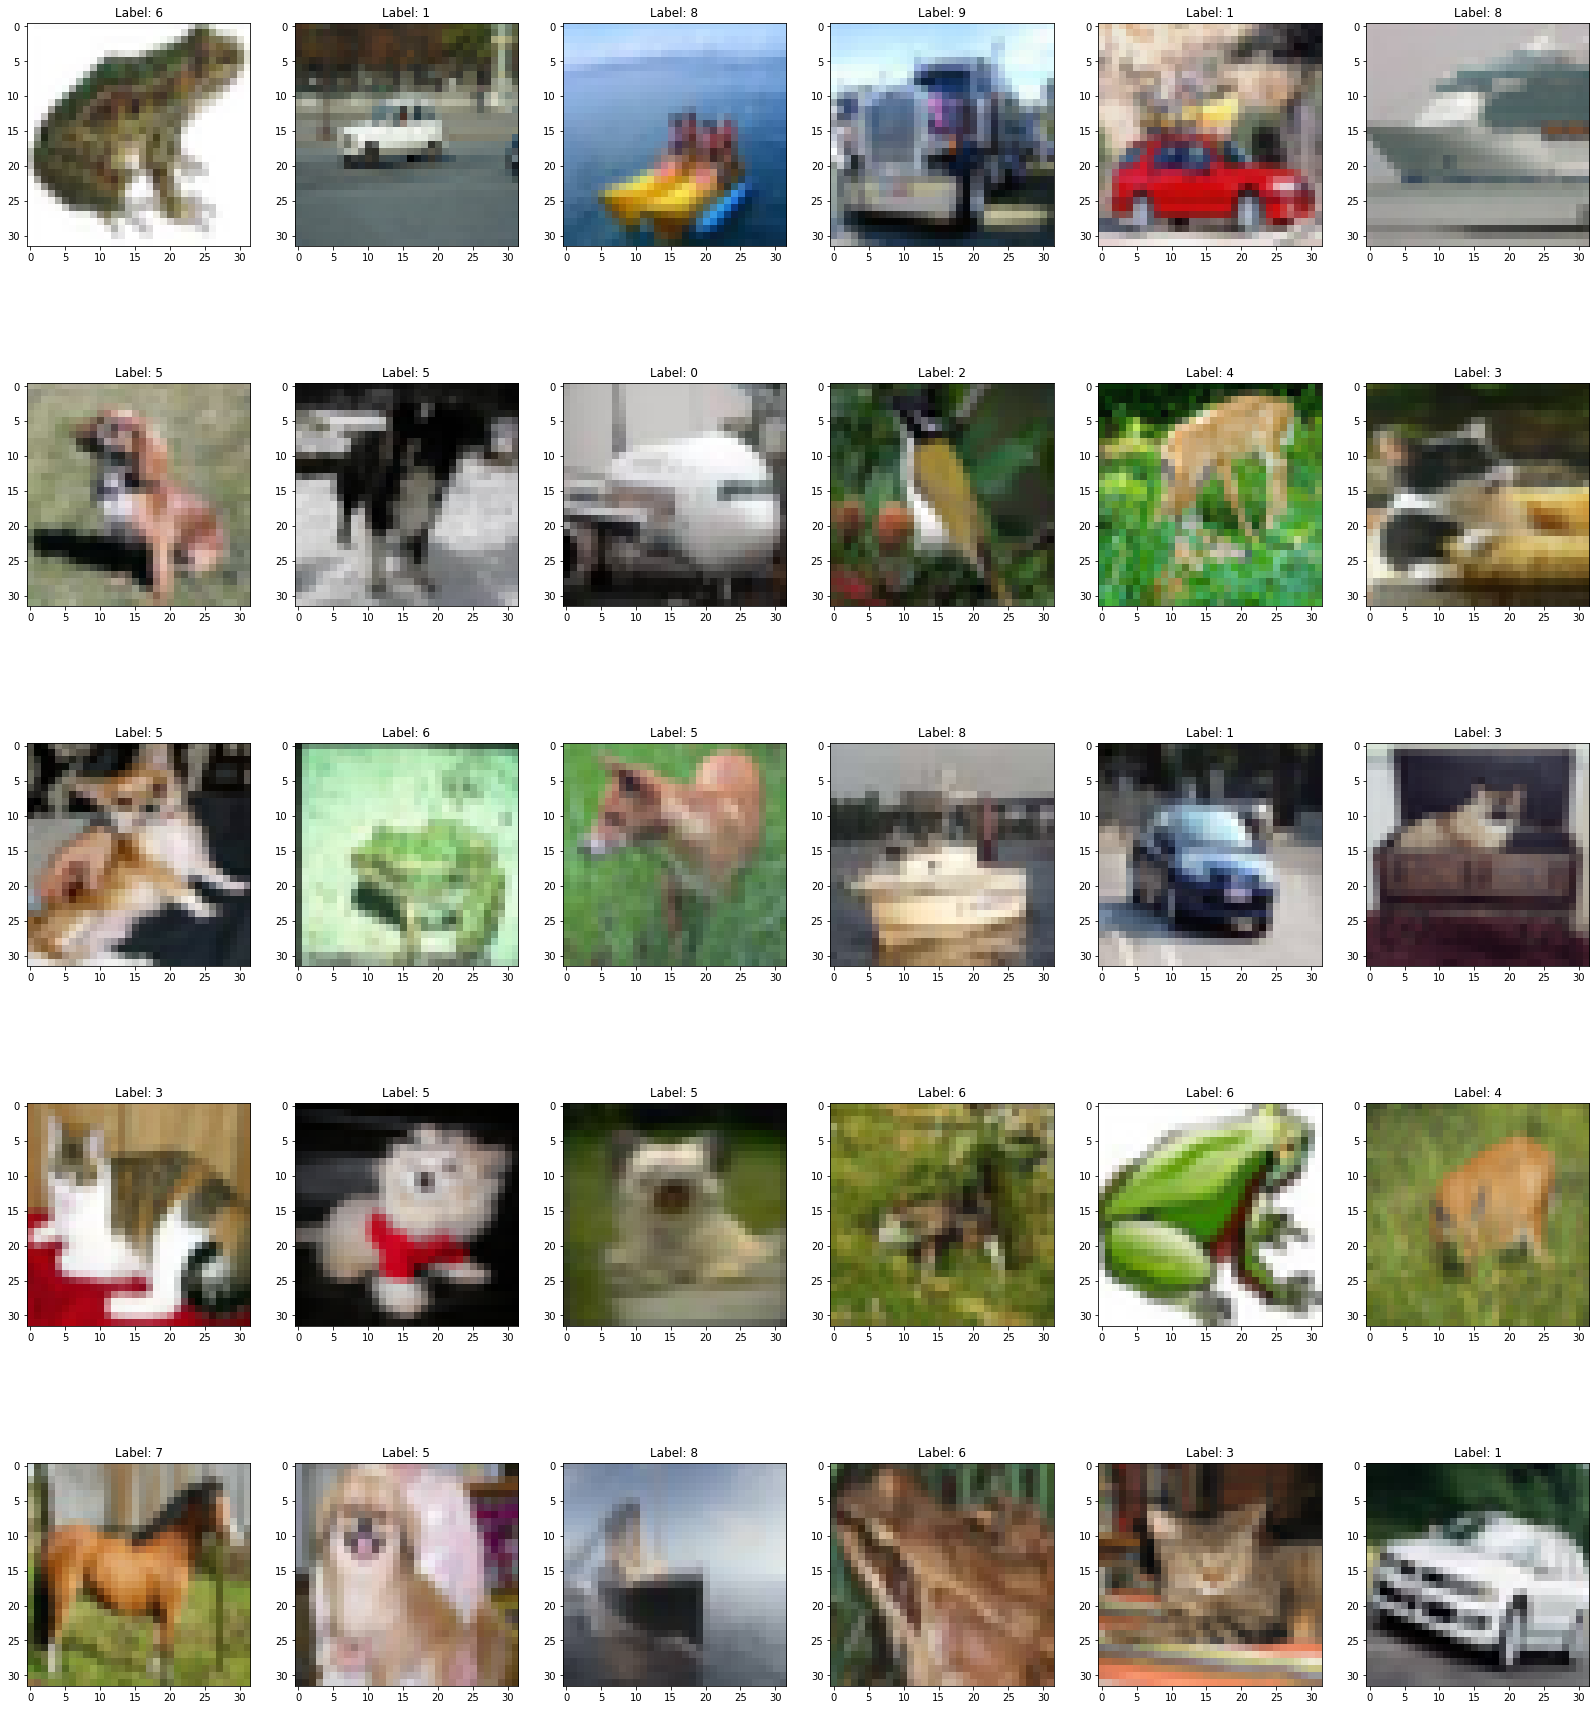

In [ ]:
sample_indexes = np.random.choice(np.arange(X_dev.shape[0], dtype = int),size = 30, replace = False) #randomly picking 30 images to display them without replacement
plt.figure(figsize = (28,32)) # over plot area where the images will be posted is 28 x 32
for (ii,jj) in enumerate(sample_indexes): # creating a loop to run through the images
    plt.subplot(5,6,ii+1)
    plt.imshow(X_dev[jj])
    plt.title("Label: %d" %Y_dev[jj]) # add labels on top of all the images
plt.show()

COMMENT

The dataset seems to be made up of random images. Since the image size is 32 x 32 pixel, the images are very blurry to the point that they are unrecognizable

SHEFFLING THE DATASET

In [ ]:
# Randomly shffling samples equally across samples
r,c,y = np.indices( (X_dev.shape[1:]) )
# shuffling samples across r,g,y
np.random.shuffle(r)
np.random.shuffle(c)
np.random.shuffle(y)
X_dev = X_dev[:,r,c,y]
X_test = X_test[:,r,c,y]

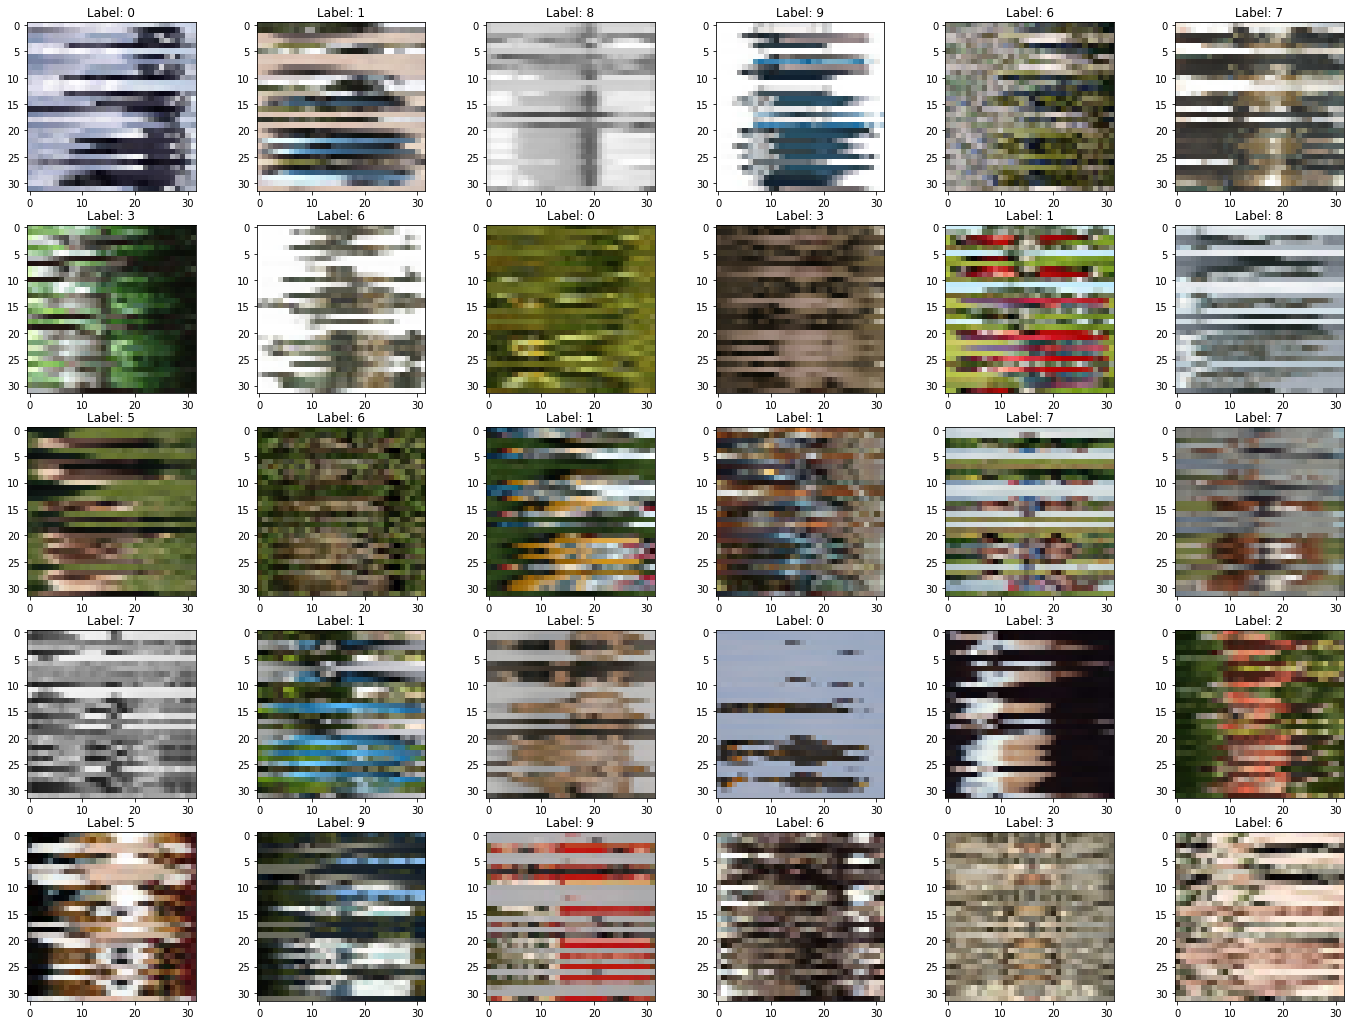

In [ ]:
# Disaplying some samples from the development set after shuffling
plt.figure(figsize = (24,18))
for (ii,jj) in enumerate(sample_indexes):
    plt.subplot(5,6,ii+1)
    plt.imshow(X_dev[jj], cmap = "gray")
    plt.title("Label: %d" %Y_dev[jj])
plt.show()

The figues are a bit blurry and hard to recognize.

SPLITTING THE DATASET INTO TEST AND TRAINING

In [ ]:
#The number of classes across samples looks balanced
# Let's shuffle the samples and split them
indexes = np.arange(X_dev.shape[0], dtype = int) # creating an index variable that contains the entire range of the developmental dataset 
np.random.shuffle(indexes) #shuffling the dataset
X_dev = X_dev[indexes]# picking out the specific X_dev and the corresponding Y_dev for the same image
Y_dev = Y_dev[indexes] # X_dev and Y_dev go together

nsplit = int(0.9*X_dev.shape[0]) # Train/validation split # the split ratio is 0.9*50k = 45k images

# Train and validation split
X_train = X_dev[:nsplit] #all the images till 37.5k images and their corresponding Y labels are saved as part of the training set
Y_train = Y_dev[:nsplit]
X_val = X_dev[nsplit:] #all the images from 37.5k to 50 k images i.e. about 12.5 k images and their corresponding Y labels are saved as part of the validation set
Y_val = Y_dev[nsplit:]

print("\nImages in Train set")
print(X_train.shape) #shape of the training set which consists of 37.5k images of 32 x 32 pixel and 3 channels (RGB)

print("\n-----------------------------")

print("\nImages in Validation set")
print(X_val.shape) #shape of the validation set which consists of 37.5k images of 32 x 32 pixel and 3 channels (RGB)


Train set
Images:  (45000, 32, 32, 3)
Labels shape:  (45000, 1)

Validation set
Images:  (5000, 32, 32, 3)
Labels shape:  (5000, 1)


COMMENT

The split ratio seems to be resonable for the validation and training dataset

The training set has 45k images of 32 x 32 pixel an the validation set has 5k of 32 x 32 pixels


EXPLORING THE TRAINING AND VALIDATION DATASET A BIT

In [ ]:
print("Training dataset",X_train.min(),X_train.max(),X_train.mean(),X_train.std())

print("\n--------------------------------------------------------------------------")

print("Validation dataset",X_val.min(),X_val.max(),X_val.mean(),X_val.std())

Training dataset 0 255 120.66826526041666 64.12821565128809

--------------------------------------------------------------------------
Validation dataset 0 255 120.82546471354166 64.21546765181328


COMMENT

It seems that the min and maximum values are 0 and 255 which is similar for both training and validation dataset. The mean and the standard deviation is also quite similar and both of them range around 121 and 64 approximately. All the values seem to be close which indicates the data has been shuffled well

## 3. Represent your labels using one hot encoding

In [ ]:
Y_train_oh = tf.keras.utils.to_categorical(Y_train) #using the keras in-built function to perform one hot encoding of the y label of the training dataset 
Y_val_oh = tf.keras.utils.to_categorical(Y_val)#using the keras in-built function to perform one hot encoding of the y label of the validation dataset 
Y_test_oh = tf.keras.utils.to_categorical(Y_test)#using the keras in-built function to perform one hot encoding of the y label of the testing dataset 

print("Labels:")
print(Y_train[:5]) #printing the first five orginal labels of the Y_training dataset
print()
print("One hot encoded labels:")
print(Y_train_oh[:5]) #printing the first five one hot encoded labels of the same Y_training dataset


Labels:
[[1]
 [8]
 [0]
 [7]
 [1]]

One hot encoded labels:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


COMMENT

After seeing the first five encoding of the labels of the training dataset,it seems that the labels have been encoded properly

## 4. Data scaling and Data augmentation

In [ ]:
# Experiment with different data scaling methods
norm_type = 0 # 0 -> min-max; 1-> standardization

if norm_type == 0:
    X_train = X_train/255 # diving the training dataset with 255, the maximum value
    X_val = X_val/255 # diving the validation dataset with 255, the maximum value
    X_test = X_test/255 # diving the testing dataset with 255, the maximum value
elif norm_type == 1:
    train_mean, train_std = X_train.mean(),X_train.std() #finding the mean and standard values of the X_train dataset
    X_train = (X_train - train_mean)/train_std # Subtracting the dataset with its mean and dividing it with stadard deviation o standardize the entire training dataset
    X_val = (X_val - train_mean)/train_std # Subtracting the dataset with its mean and dividing it with stadard deviation o standardize the entire validation dataset
    X_test = (X_test - train_mean)/train_std # Subtracting the dataset with its mean and dividing it with stadard deviation o standardize the entire testing dataset
else:
    pass
# Create your data augmentation object to improve training 
'''We decided not perform data augmentation for fully connected neural network'''

# set your batch size
batch = 16

COMMENT

Here we have used min-max scaling as the scaling technique as it is an image classification problem

## Fully Connected Model

## 5. Define your  model, cost function, optimizer, learning rate

In [ ]:
def my_model_fully_connected(ishape = (32,32,3) , k =10 , lr = 1e-4): #shape of images, classes , learning rate
    model_input = tf.keras.Input(shape = ishape)
    l2=tf.keras.layers.Dense(96,activation='relu')(model_input)  # a dense layer is being created which uses 'relu' as the acitivation
    l3=tf.keras.layers.Dense(256,activation='relu')(l2)  # a dense layer is being created which uses 'relu' as the acitivation
    l4= tf.keras.layers.MaxPool2D((2,2))(l3) #max_pooling layer defined
    l4_drop = tf.keras.layers.Dropout(0.3)(l4) #dropout layer defined
    l5=tf.keras.layers.Dense(384,activation='relu')(l4_drop) #dense layer defined
    l5_drop = tf.keras.layers.Dropout(0.3)(l5) #dropout layer defined
    l1_flatten = tf.keras.layers.Flatten()(l5_drop) #layers are being flattened, input is the previous layer
    l6_drop = tf.keras.layers.Dropout(0.3)(l1_flatten)
    out = tf.keras.layers.Dense(k,activation = 'softmax')(l6_drop) # one layer that is output , k is classes, activation is softmax we need a probabilty at the end , input is the previouS layer
    model = tf.keras.models.Model(inputs = model_input, outputs = out)#defining the model # define inputs and outputs to the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics = ["accuracy"]) # compiling the model - define the optimzer, cost function 
    return model
    

COMMENT

Relu is used as the activation for the middle layers to get rid of any negative values.

Softmax is used as the activation for the last layer as it is a muticlass classifictaion problem.

Here I have used categorical_crossentropy as the loss and accuracy as the metric.


MODEL SUMMARY OF THE FULLY CONNECTED MODEL

In [ ]:
model = my_model()
print(model.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
dense_4 (Dense)              (None, 32, 32, 96)        384       
_________________________________________________________________
dense_5 (Dense)              (None, 32, 32, 256)       24832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
dense_6 (Dense)              (None, 16, 16, 384)       98688     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 384)      

COMMENT 

There seeem to be 1.1 million parameters to train.

## 6. Define your callbacks (save your model, patience, etc.)

In [ ]:
model_name_fcn = "team_(34)_FCN.h5"
#CALLBACK - 1 - early_stop
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 20) # if for 20 epochs, the val_loss does not improve the training is going to be interuppted
#Patience is how long the model is going to train without interupting

#CALLBACK - 2 - monitor
monitor = tf.keras.callbacks.ModelCheckpoint (model_name_fcn, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# In this callback you monitor will save the best model and the weights
# This callback is going to keep on checking the validation error and see if the validation error is decreasing, if not then it will save the last model as the best model
# Mode can be used in this function, it is for whether u want to save the minimum or maximum value of the cost function, we are not defining mode as it is automatically defined defined by tensorflow

#CALLBACK - 3 - lr_schedule
def scheduler(epoch, lr):
  if epoch%10==0:  #after 10 epoch reduce the learning rate by a factor of 2 
    lr = lr/2
  return lr
  
lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 0)# defining the callback

COMMENT

I add three callbacks to better so that the model could easily be computed.


## 7. Train your model

In [ ]:
model= my_model_fully_connected() #model i.e. my_model_fully_connected model that was defined in step 5 above
#now fitting my model
model.fit(X_train,Y_train_oh,batch_size = batch, epochs=  100, verbose = 1, callbacks = [early_stop, monitor, lr_schedule], validation_data = (X_val,Y_val_oh))
#larger batches take longer to train and smaller batch sizes can train faster
#graident approximation for a small batch size may not be that good, so we decided to stick with the not so big batch size
#epoch is the number of iterations 


Epoch 1/100
2344/2344 [==============================] - 431s 183ms/step - loss: 2.0267 - accuracy: 0.2622 - val_loss: 1.6477 - val_accuracy: 0.4221
Epoch 2/100
2344/2344 [==============================] - 423s 181ms/step - loss: 1.6257 - accuracy: 0.4290 - val_loss: 1.4984 - val_accuracy: 0.4742
Epoch 3/100
2344/2344 [==============================] - 425s 181ms/step - loss: 1.4817 - accuracy: 0.4797 - val_loss: 1.4366 - val_accuracy: 0.4998
Epoch 4/100
2344/2344 [==============================] - 425s 182ms/step - loss: 1.4116 - accuracy: 0.5067 - val_loss: 1.3863 - val_accuracy: 0.5133
Epoch 5/100
2344/2344 [==============================] - 424s 181ms/step - loss: 1.3550 - accuracy: 0.5238 - val_loss: 1.3433 - val_accuracy: 0.5298
Epoch 6/100
2344/2344 [==============================] - 424s 181ms/step - loss: 1.3131 - accuracy: 0.5424 - val_loss: 1.3176 - val_accuracy: 0.5365
Epoch 7/100
2344/2344 [==============================] - 425s 181ms/step - loss: 1.2815 - accuracy: 0.5544

COMMENT

The training and validation dataset are fit to the model

LOOK AND ADD

Here we stop at epoch lower than 100 because the validation error is not improving any further



## 8. Test your model

313/313 [==============================] - 3s 10ms/step - loss: 1.2020 - accuracy: 0.5785
The performance of the test dataset is as follows
Categorical cross-entropy: 1.2019541263580322
Accuracy: 0.578499972820282
------------------------------------------------------------------------------------
The size of wrongly classified images is mentioned below 
4215
------------------------------------------------------------------------------------
LOOKING AT THE WRONGLY CLASSIFIED IMAGES


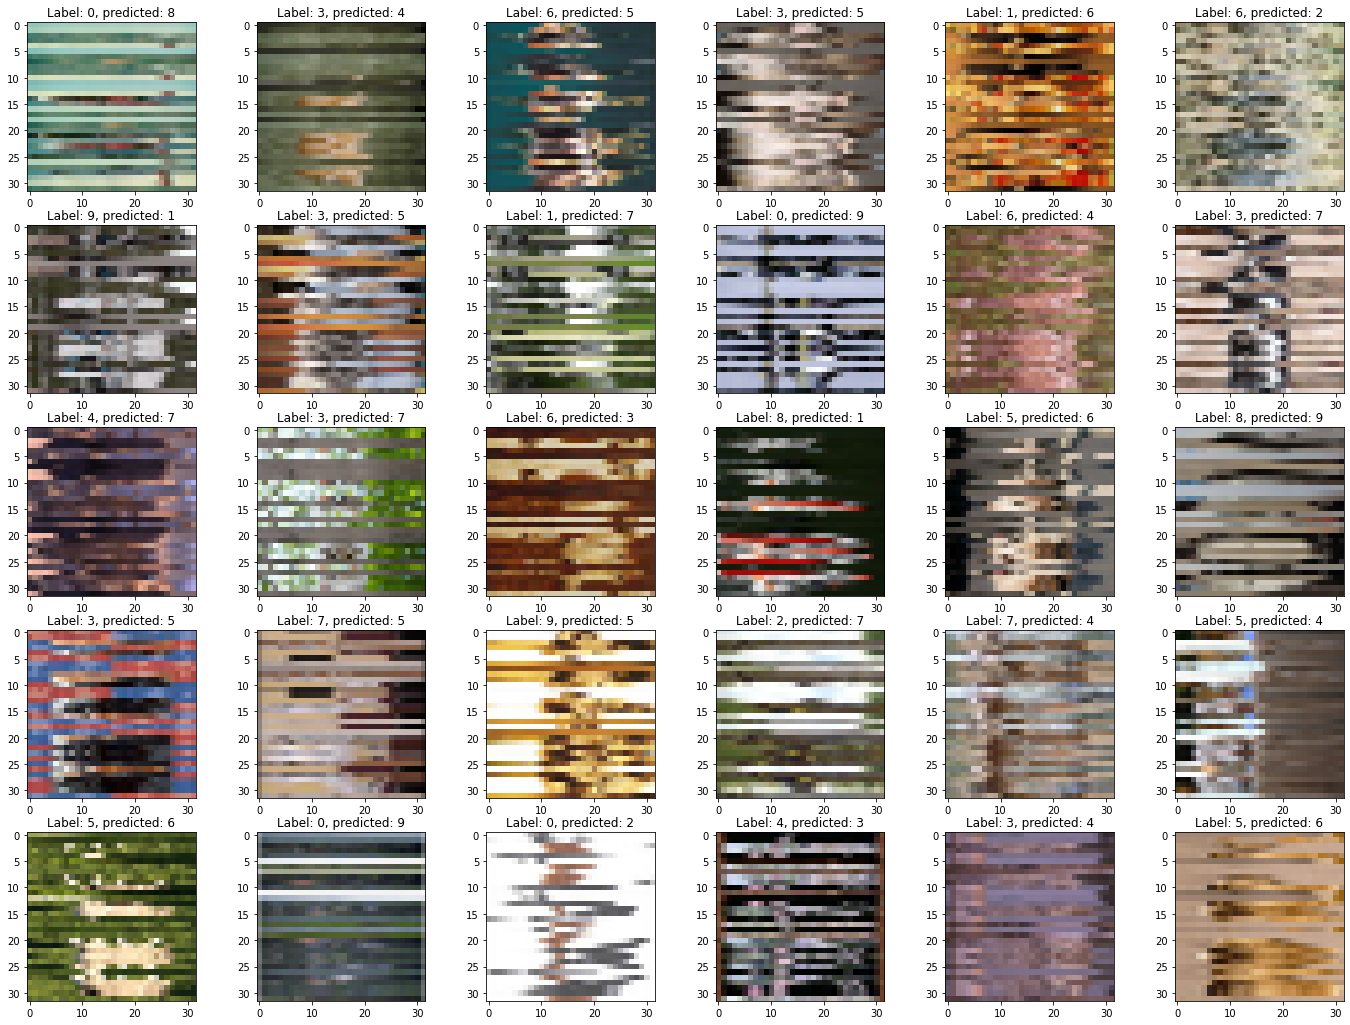

In [ ]:
model.load_weights(model_name)# loading the weight we are produced during model training
metrics = model.evaluate(X_test,Y_test_oh)# it will return the loss and metrics when we are testing the model # here we have categorical cross entropy here is loss and accuracy is the metrics
#print(metrics) # in step 5 we stated that we want to measure and monitor two metrics
print("The performance of the test dataset is as follows")
print("Categorical cross-entropy:" , metrics[0])
print("Accuracy:" , metrics[1])

print("------------------------------------------------------------------------------------")

Ypred = model.predict(X_test).argmax(axis = 1)# Here we are looking at the images and predict the labels across the rows of the test set
 #wrongly clasified images are when the predictions are differnet from the ground truth i.e. test set
wrong_indexes = np.where(Ypred != Y_test[:,0])[0] #printing the indexes where y_pred is not equal to y_test
print("The size of wrongly classified images is mentioned below ") 
print(wrong_indexes.size)#printing the size of the wrongly classified images

print("------------------------------------------------------------------------------------")
print("LOOKING AT THE WRONGLY CLASSIFIED IMAGES")
# Displaying some samples from the development set
sample_indexes = np.random.choice(np.arange(wrong_indexes.shape[0], dtype = int),size = 30, replace = False)#chosing 30 images at random where they have been classified incorrectly
plt.figure(figsize = (24,18))
for (ii,jj) in enumerate(sample_indexes):# looking through 30 wrong images 
    plt.subplot(5,6,ii+1)# each figure will have a different subplot. Each subplot wiull have 5 rows and 6 columns starting at index 1 (ii+1)
    plt.imshow(X_test[wrong_indexes[jj]], cmap = "gray") # the wrongly classified images will show at position jj
    plt.title("Label: %d, predicted: %d" %(Y_test[wrong_indexes[jj]],Ypred[wrong_indexes[jj]]))   
    # the original label of the wrongly classfied images along with the predcited labels will be added on the top
plt.show()

For fully connected model we get the follwing metrics on testing the model:

categorical cross-entropy: 1.2

accuracy: 0.58

The size of the wrongly classified iamges is 4215.

# Convolutional Model



We shuffled the images at the begining of the dataset for fully connected model before even splitting the dataset which is not what we want for the CNN model that we are building. Also we realised that when the split ratio was 9%, the CNN model gave better resuls.Finally, data augmentation has been performed for the CNN model unlike the fully connected model. 

So we will pull the dataset again and redefine it.

## 1. Load your data

In [ ]:
(X_dev, Y_dev), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data() #Loading the dataset

print(X_dev.shape)
print(X_test.shape)

#printing out the shape of the developmental dataset
print("Development set")
print("Images: ",X_dev.shape) #shape of the images of the developmental dataset
print("Labels shape:",Y_dev.shape) #shape of the label of the developmental dataset
print("\nNumber of classes:",np.unique(Y_dev).size)
print("\nClasses:",np.unique(Y_dev)) #the number of classes in the developmental dataset
print("\n---------------------------------------------")
#printing out the shape of the testing dataset
print("\nTest set")
print("Images: ",X_test.shape) #shape of the images of the testing dataset
print("Labels shape: ",Y_test.shape) #shape of the label of the testing dataset



170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
Development set
Images:  (50000, 32, 32, 3)
Labels shape: (50000, 1)

Number of classes: 10

Classes: [0 1 2 3 4 5 6 7 8 9]

---------------------------------------------

Test set
Images:  (10000, 32, 32, 3)
Labels shape:  (10000, 1)


COMMENT

The number of classes is 10.

In the developmental set we have 50k images of dimenions 32 x 32 pixel with 3 channels (RGB).

In the test set we have 10k images of dimenions 32 x 32 pixel with 3 channels (RGB).

## 2. Explore your data

EXPLORING THE LABELS OF THE DEVELOPMENTAL DATASET

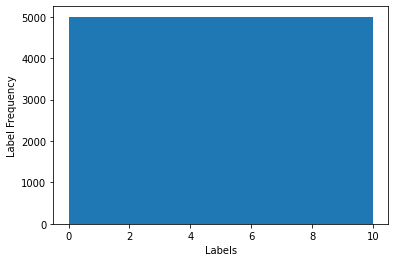

In [ ]:
plt.figure()
plt.hist(Y_dev, bins = range(11)) #since the classes are 10, then the range will be 11
plt.xlabel("Labels") #labelling the x -axis
plt.ylabel("Label Frequency")#labelling the y -axis
plt.show()

COMMENT

All the 10 classes are equally distributed across the developmental dataset

EXPLORING THE LABELS OF THE TEST DATASET

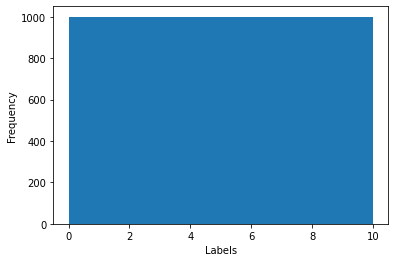

In [ ]:
plt.figure()
plt.hist(Y_test,bins = range(0,11))#since the classes are 10, then the range will range from 0 to 11
plt.xlabel("Labels") #labelling the x -axis
plt.ylabel("Frequency") #labelling the y -axis
plt.show()

COMMENT

All the 10 classes are equally distributed across the test dataset



TAKING A LOOK AT THE DATASET

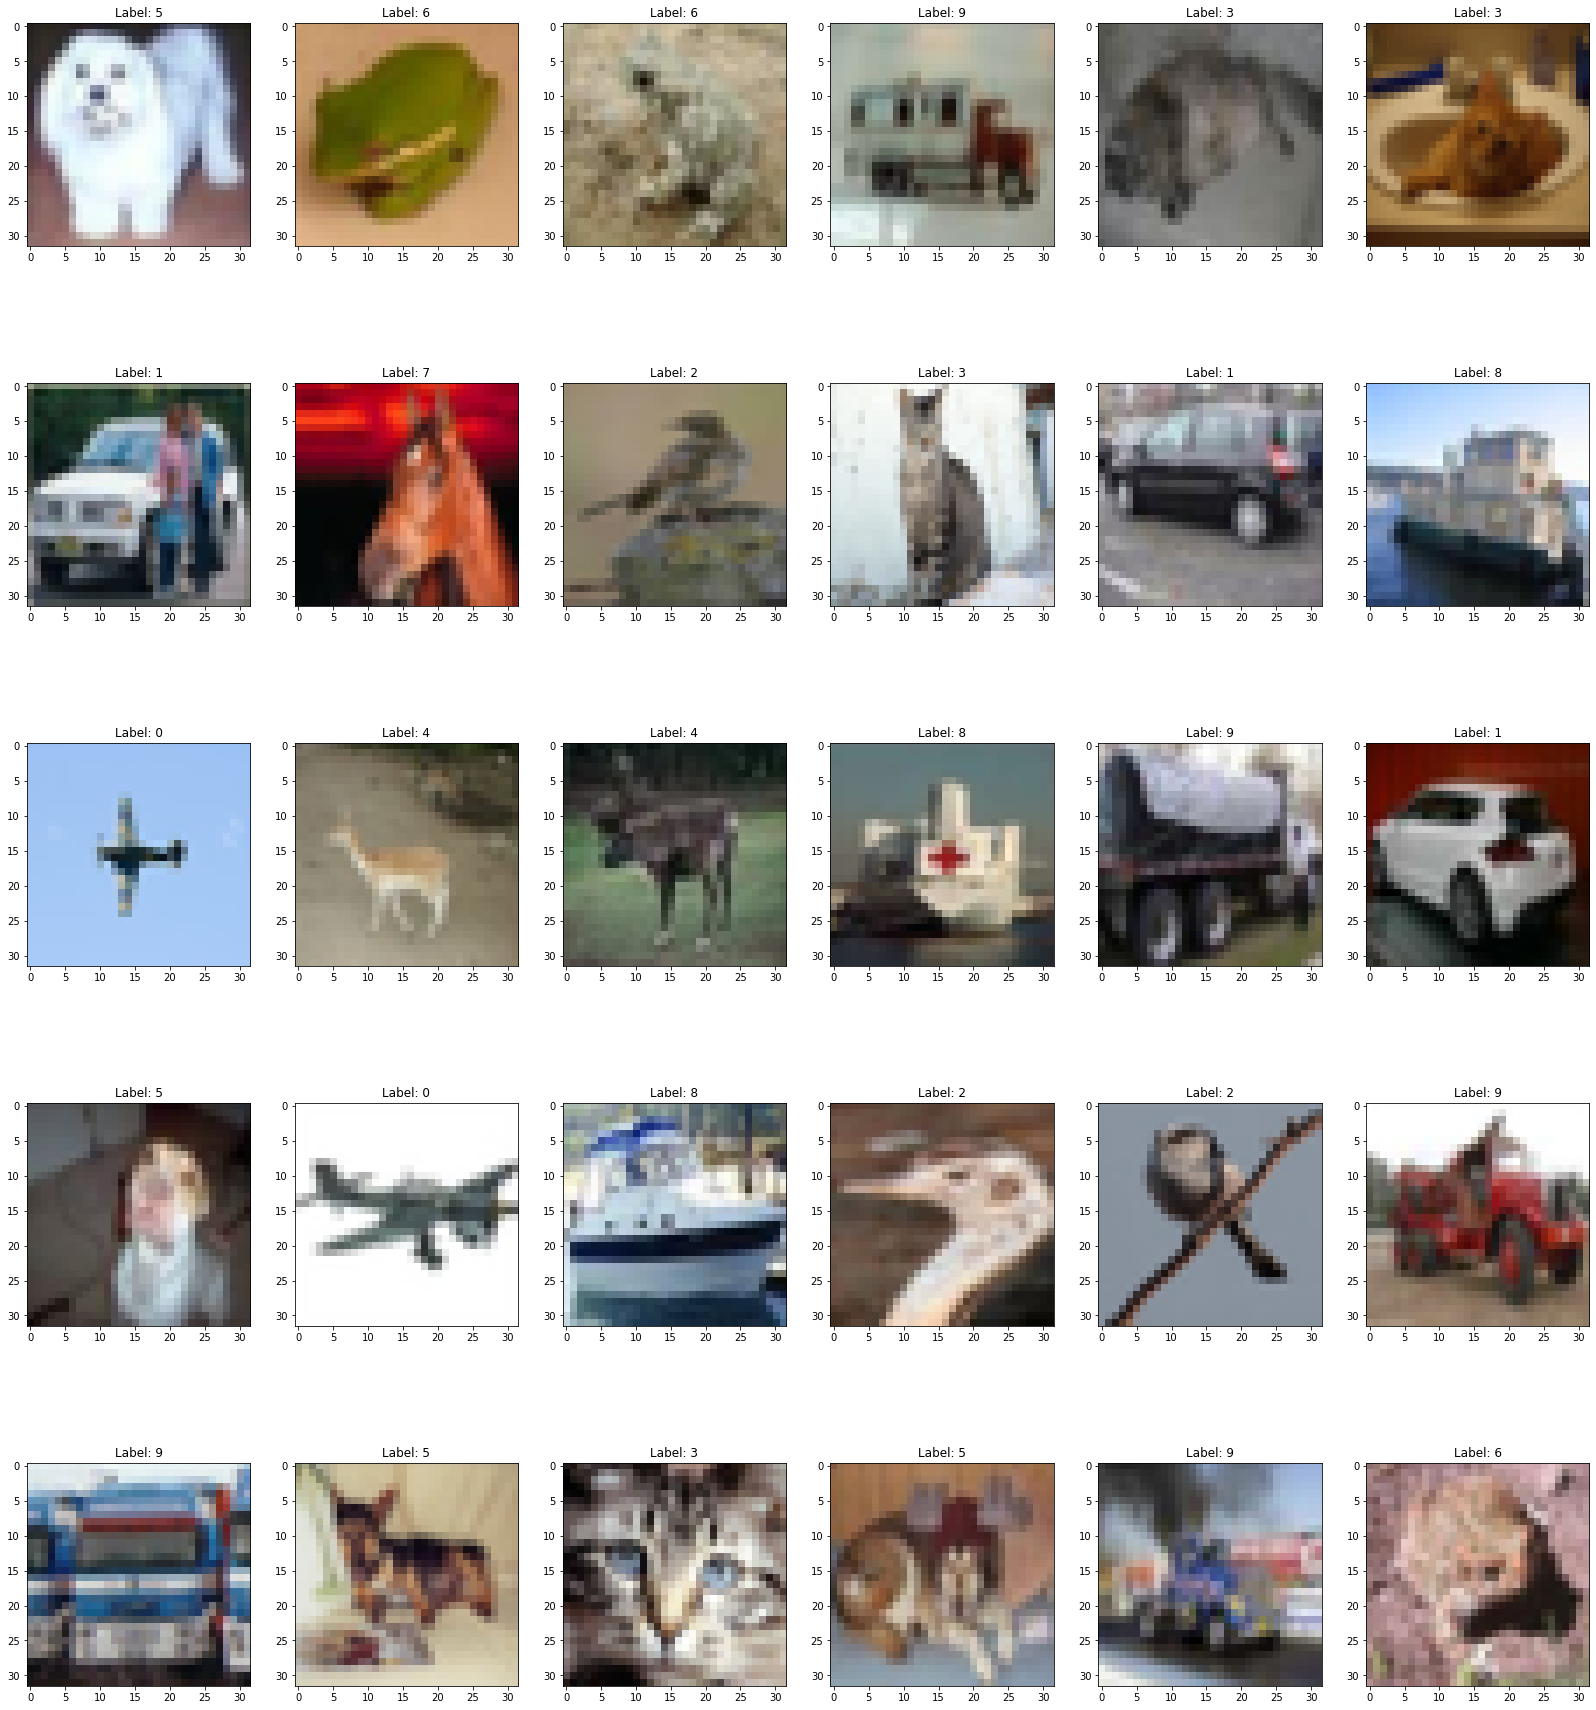

In [ ]:
sample_indexes = np.random.choice(np.arange(X_dev.shape[0], dtype = int),size = 30, replace = False) #randomly picking 30 images to display them without replacement
plt.figure(figsize = (28,32)) # over plot area where the images will be posted is 28 x 32
for (ii,jj) in enumerate(sample_indexes): # creating a loop to run through the images
    plt.subplot(5,6,ii+1)
    plt.imshow(X_dev[jj])
    plt.title("Label: %d" %Y_dev[jj]) # add labels on top of all the images
plt.show()

COMMENT

The dataset seems to be made up of random images. Since the image size is 32 x 32 pixel, the images are less bulurry than what they were when we were exploring the dataste.

SPLITTING THE DATASET INTO TEST AND TRAINING

In [ ]:
#The number of classes across samples looks balanced
# Let's shuffle the samples and split them
indexes = np.arange(X_dev.shape[0], dtype = int) # creating an index variable that contains the entire range of the developmental dataset 
np.random.shuffle(indexes) #shuffling the dataset
X_dev = X_dev[indexes]# picking out the specific X_dev and the corresponding Y_dev for the same image
Y_dev = Y_dev[indexes] # X_dev and Y_dev go together

nsplit = int(0.9*X_dev.shape[0]) # Train/validation split # the split ratio is 0.9*50k = 45k images

# Train and validation split
X_train = X_dev[:nsplit] #all the images till 37.5k images and their corresponding Y labels are saved as part of the training set
Y_train = Y_dev[:nsplit]
X_val = X_dev[nsplit:] #all the images from 37.5k to 50 k images i.e. about 12.5 k images and their corresponding Y labels are saved as part of the validation set
Y_val = Y_dev[nsplit:]

print("\nImages in Train set")
print(X_train.shape) #shape of the training set which consists of 37.5k images of 32 x 32 pixel and 3 channels (RGB)

print("\n-----------------------------")

print("\nImages in Validation set")
print(X_val.shape) #shape of the validation set which consists of 37.5k images of 32 x 32 pixel and 3 channels (RGB)


Images in Train set
(45000, 32, 32, 3)

-----------------------------

Images in Validation set
(5000, 32, 32, 3)


COMMENT

The split ratio seems to be resonable for the validation and training dataset

EXPLORING THE TRAINING AND VALIDATION DATASET A BIT

In [ ]:
print("Training dataset",X_train.min(),X_train.max(),X_train.mean(),X_train.std())

print("\n--------------------------------------------------------------------------")

print("Validation dataset",X_val.min(),X_val.max(),X_val.mean(),X_val.std())

Training dataset 0 255 120.65624245515046 64.15429152446812

--------------------------------------------------------------------------
Validation dataset 0 255 121.169469140625 64.11027388680057


COMMENT

It seems that the min and maximum values are 0 and 255 which is similar for both training and validtaion dataset. The mean and the standard deviation is also quite similar and both of them range around 121 and 64 approximately. All the values seem to be close which indicates the data has been shuffled well

## 3. Represent your labels using one hot encoding

In [ ]:
Y_train_oh = tf.keras.utils.to_categorical(Y_train) #using the keras in-built function to perform one hot encoding of the y label of the training dataset 
Y_val_oh = tf.keras.utils.to_categorical(Y_val)#using the keras in-built function to perform one hot encoding of the y label of the validation dataset 
Y_test_oh = tf.keras.utils.to_categorical(Y_test)#using the keras in-built function to perform one hot encoding of the y label of the testing dataset 

print("Labels:")
print(Y_train[:5]) #printing the first five orginal labels of the Y_training dataset
print()
print("One hot encoded labels:")
print(Y_train_oh[:5]) #printing the first five one hot encoded labels of the same Y_training dataset


Labels:
[[4]
 [2]
 [2]
 [2]
 [4]]

One hot encoded labels:
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


COMMENT

After seeing the first five encoding of the labels of the training dataset,it seems that the labels have been encoded properly

## 4. Data scaling and Data augmentation

In [ ]:
norm_type = 0 # 0 -> min-max; 1-> standardization
if norm_type == 0:
    X_train = X_train/255 # diving the training dataset with 255, the maximum value
    X_val = X_val/255 # diving the validation dataset with 255, the maximum value
    X_test = X_test/255 # diving the testing dataset with 255, the maximum value
elif norm_type == 1:
    train_mean, train_std = X_train.mean(),X_train.std() #finding the mean and standard values of the X_train dataset
    X_train = (X_train - train_mean)/train_std # Subtracting the dataset with its mean and dividing it with stadard deviation o standardize the entire training dataset
    X_val = (X_val - train_mean)/train_std # Subtracting the dataset with its mean and dividing it with stadard deviation o standardize the entire validation dataset
    X_test = (X_test - train_mean)/train_std # Subtracting the dataset with its mean and dividing it with stadard deviation o standardize the entire testing dataset
else:
    pass

Here we apply the min max scaling

Now performing data augmentation on training data set only

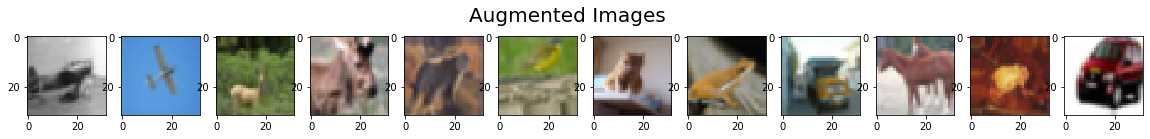

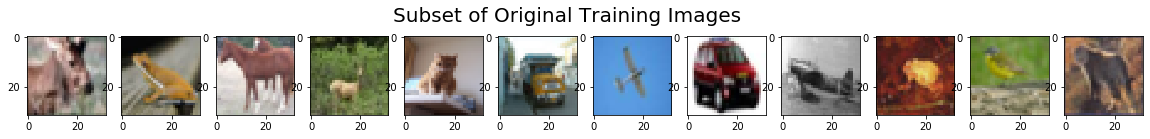

In [ ]:

# Create your data augmentation object to improve training 
from keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(
    width_shift_range = 0.1,
    rotation_range=8.0,
    height_shift_range = 0.1,
    horizontal_flip = True)

datagen_train.fit(X_train)
x_train_subset = X_train[:12]
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

    

fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()
# set your batch size
batch = 18




COMMENT

Here we have used min-max scaling as the scaling technique as it is an image classification problem

## 5. Define your  model, cost function, optimizer, learning rate

In [ ]:
def my_model_cnn(ishape = (32,32,3),k = 10, lr = 1e-4): # RGB image is 3 # k or classes is 10 #lr is the learning rate
    model_input = tf.keras.layers.Input(shape = ishape)
    l1 = tf.keras.layers.Conv2D(48, (3,3), padding='same', activation='relu')(model_input) # Conv2D as we are working with 2d images , # number of filters is 48 # kernal size is 3 x 3
    l2 = tf.keras.layers.Conv2D(48, (3,3), padding='same', activation='relu')(l1) # 48 filters assumed  #padding is kept same #activation is relu
    l2_drop = tf.keras.layers.Dropout(0.25)(l2) #adding dropout 
    l3 = tf.keras.layers.MaxPool2D((2,2))(l2_drop)  # here we chose a pooling size of 2 x 2 
    l4 = tf.keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(l3) # after max pooling we double the number of filters #padding is kept same #activation is relu
    l5 = tf.keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(l4)# after cnn layer we double the number of filters #padding is kept same #activation is relu
    l5_drop = tf.keras.layers.Dropout(0.3)(l5)  #adding dropout 
    l6 = tf.keras.layers.MaxPool2D((2,2))(l5_drop) # here we chose a pooling size of 2 x 2 
    l7= tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu')(l6)# we double the number of filters #padding is kept same #activation is relu
    l8 = tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu')(l7)# we double the number of filters #padding is kept same #activation is relu
    l9 = tf.keras.layers.MaxPool2D((2,2))(l8) # here we chose a pooling size of 2 x 2 
    l9_drop = tf.keras.layers.Dropout(0.4)(l9)  #adding dropout 
    
    flat = tf.keras.layers.Flatten()(l9_drop)# # we double the number of filters #padding is kept same #activation is relu
    l10= tf.keras.layers.Dense(2048,activation = 'relu')(flat) # creating the last dense layer
    l10_drop = tf.keras.layers.Dropout(0.3)(l10)
    l11= tf.keras.layers.Dense(2048,activation = 'relu')(l10_drop)
    
    out = tf.keras.layers.Dense(k,activation = 'softmax')(l11) #softmax is the activation for the last layer
    model = tf.keras.models.Model(inputs = model_input, outputs = out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics = ["accuracy"])
    return model

COMMENT

Relu is used as the activation for the middle layers to get rid of any negative values.

Softmax is used as the activation for the last layer as it is a muticlass classifictaion problem.

Here I have used categorical_crossentropy as the loss and accuracy as the metric.

In [ ]:
model = my_model_cnn()
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 48)        1344      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 48)        20784     
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 48)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 96)        41568     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040 

COMMENT

There seem to be 13.6 million parameters to train and the model will take longer to train

## 6. Define your callbacks (save your model, patience, etc.)

In [ ]:
model_name_cnn = "team_(34)_CNN.h5"

#CALLBACK - monitor
monitor = tf.keras.callbacks.ModelCheckpoint(model_name_cnn, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# you save the best model and the weights
#the callback is going to keep on checking the validation error and if the validation error decreases the we will save the last model as the best model



COMMENT

I add one callback to better so that the model could easily be computed

## 7. Train your model

In [ ]:
model.fit(datagen_train.flow(X_train, Y_train_oh,batch_size = batch),epochs = 200, callbacks= [monitor],verbose = 1,validation_data=(X_val,Y_val_oh))

# batch size, the number of epoch have been defined, and the callbacks have been defined

Epoch 1/200
2500/2500 [==============================] - 90s 24ms/step - loss: 1.8197 - accuracy: 0.3208 - val_loss: 1.3024 - val_accuracy: 0.5536
Epoch 2/200
2500/2500 [==============================] - 60s 24ms/step - loss: 1.2877 - accuracy: 0.5356 - val_loss: 1.2449 - val_accuracy: 0.5580
Epoch 3/200
2500/2500 [==============================] - 60s 24ms/step - loss: 1.0804 - accuracy: 0.6117 - val_loss: 0.9680 - val_accuracy: 0.6586
Epoch 4/200
2500/2500 [==============================] - 60s 24ms/step - loss: 0.9315 - accuracy: 0.6699 - val_loss: 0.8060 - val_accuracy: 0.7120
Epoch 5/200
2500/2500 [==============================] - 60s 24ms/step - loss: 0.8283 - accuracy: 0.7090 - val_loss: 0.8738 - val_accuracy: 0.6888
Epoch 6/200
2500/2500 [==============================] - 60s 24ms/step - loss: 0.7727 - accuracy: 0.7307 - val_loss: 0.7467 - val_accuracy: 0.7338
Epoch 7/200
2500/2500 [==============================] - 60s 24ms/step - loss: 0.7169 - accuracy: 0.7494 - val_loss: 0

COMMENT

The training and validation dataset are fit to the model

The accuray of the training improved with the number of iterations. However, towards the end the validation accuracy did not increase much

Here we stop at epoch lower than 200 because the validation error is not improving any further

## 8. Test your model

313/313 [==============================] - 3s 8ms/step - loss: 0.3827 - accuracy: 0.8892
The performance of the test dataset is as follows
Categorical cross-entropy: 0.3826768696308136
Accuracy: 0.88919997215271
------------------------------------------------------------------------------------
The size of wrongly classified images is mentioned below 
1108
------------------------------------------------------------------------------------
LOOKING AT THE WRONGLY CLASSIFIED IMAGES


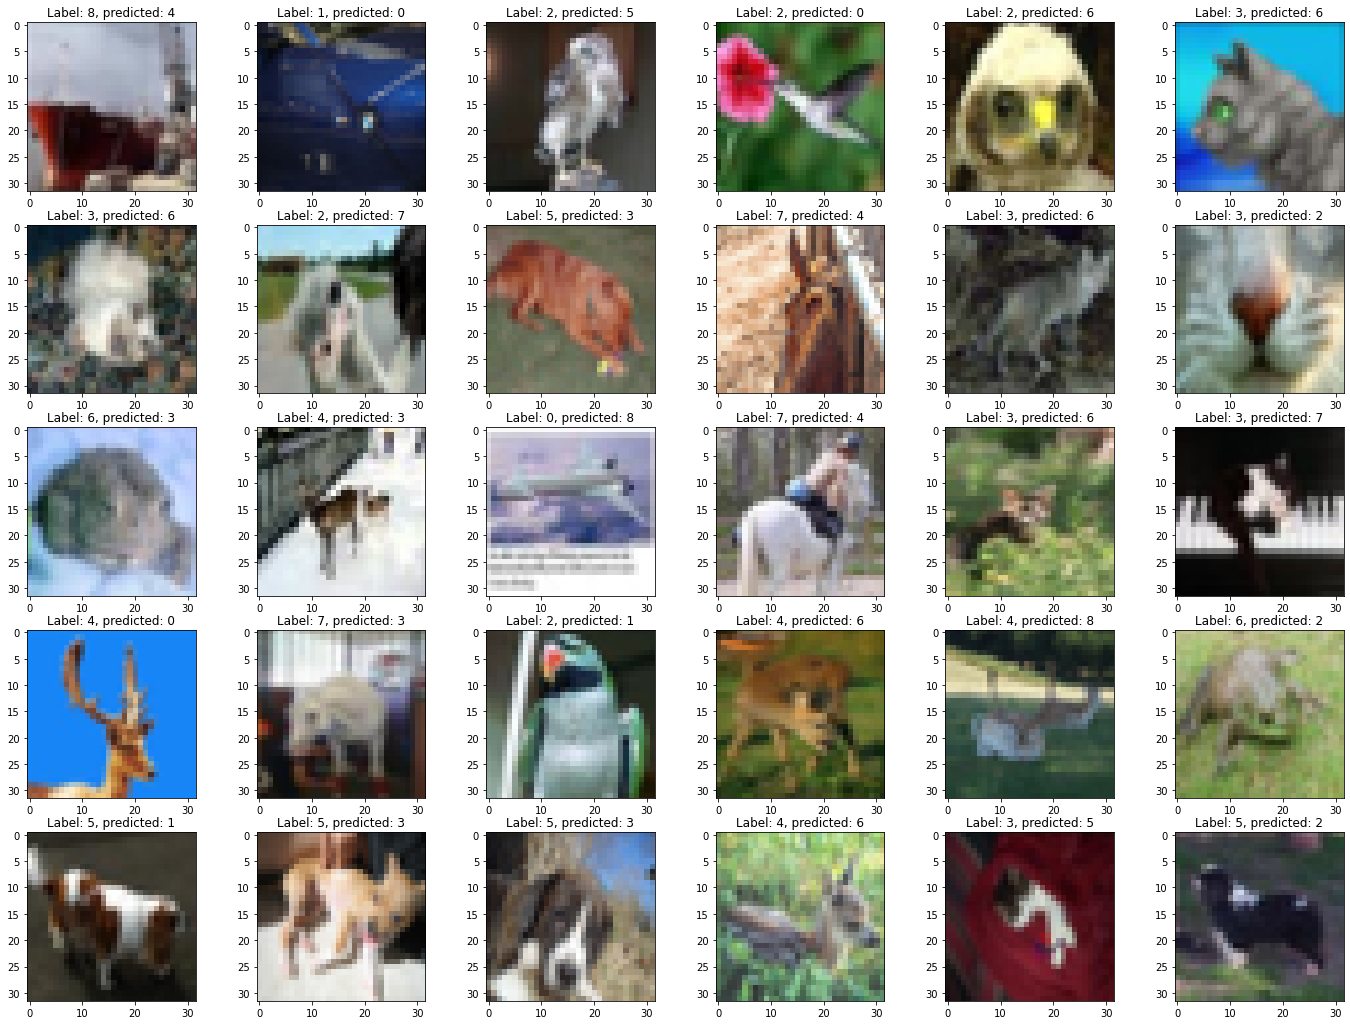

In [ ]:
model.load_weights(model_name_cnn)# loading the weight we are produced during model training
metrics = model.evaluate(X_test,Y_test_oh)# it will return the loss and metrics when we are testing the model # here we have categorical cross entropy here is loss and accuracy is the metrics
#print(metrics) # in step 5 we stated that we want to measure and monitor two metrics
print("The performance of the test dataset is as follows")
print("Categorical cross-entropy:" , metrics[0])
print("Accuracy:" , metrics[1])

print("------------------------------------------------------------------------------------")

Ypred = model.predict(X_test).argmax(axis = 1)# Here we are looking at the images and predict the labels across the rows of the test set
 #wrongly clasified images are when the predictions are differnet from the ground truth i.e. test set
wrong_indexes = np.where(Ypred != Y_test[:,0])[0] #printing the indexes where y_pred is not equal to y_test
print("The size of wrongly classified images is mentioned below ") 
print(wrong_indexes.size)#printing the size of the wrongly classified images

print("------------------------------------------------------------------------------------")
print("LOOKING AT THE WRONGLY CLASSIFIED IMAGES")
# Displaying some samples from the development set
sample_indexes = np.random.choice(np.arange(wrong_indexes.shape[0], dtype = int),size = 30, replace = False)#chosing 30 images at random where they have been classified incorrectly
plt.figure(figsize = (24,18))
for (ii,jj) in enumerate(sample_indexes):# looking through 30 wrong images 
    plt.subplot(5,6,ii+1)# each figure will have a different subplot. Each subplot wiull have 5 rows and 6 columns starting at index 1 (ii+1)
    plt.imshow(X_test[wrong_indexes[jj]], cmap = "gray") # the wrongly classified images will show at position jj
    plt.title("Label: %d, predicted: %d" %(Y_test[wrong_indexes[jj]],Ypred[wrong_indexes[jj]]))   
    # the original label of the wrongly classfied images along with the predcited labels will be added on the top
plt.show()

Upon testing the model we notice that the accuracy is 89%and the loss is 0.39. The images are much more easier to read. The size of the wrongly clasified iamges is 1108.